# Brief introduction to Machine Learning (ML)

#### Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey
#### Date = 08/2022


source link (https://developer.qualcomm.com/sites/default/files/attachments/learning_resources_01-01.png)

## Different types of machine learning

source link (https://livebook.manning.com/book/grokking-machine-learning/chapter-2/1)

## Supervised Learning
 - ### Regression
 - ### Classification
## Unsupervised Learning
 - ### Clustering

source (http://dx.doi.org/10.1007/978-3-319-21903-5_5)

## Applications
 - Identifying benign or malignant cells/tissues for cancer 
 - Business (price of housing, car insurance)
 - Recommendation: Amazon, Netflix, Youtube
 - Anomaly detection: Credit card fraud


## Machine Learning with Python 

#### Thanks to a lot of different python libraries
#### NumPy, SciPy, Pandas, Matplotlib etc.

source (https://www.fireblazeaischool.in/blogs/wp-content/uploads/2020/06/Python-Libraries-1024x683.png)

## Our focus here is on Scikit-Learn
https://scikit-learn.org

### Why scikit-learn

 - #### Free 
 - #### Well-designed to work with:
- Numpy (https://numpy.org/)
- Scipy (https://scipy.org/)
 - #### Regression, Classification, and Clustering algorithms
 - #### Easy Implementation
 - #### Well documented

In [3]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pickle

dataset source (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)
CO2 emission dataset
I have cleaned the original dataset 
Understanding the table																			
Model	4WD/4X4 = Four-wheel drive																		
	AWD = All-wheel drive																		
	FFV = Flexible-fuel vehicle																		
	SWB = Short wheelbase																		
	LWB = Long wheelbase																		
	EWB = Extended wheelbase																		
Transmission	A = automatic																		
	AM = automated manual																		
	AS = automatic with select shift																		
	AV = continuously variable																		
	M = manual																		
	3 – 10 = Number of gears																		
Fuel type	X = regular gasoline																		
	Z = premium gasoline																		
	D = diesel																		
	E = ethanol (E85)																		
	N = natural gas																		
Fuel consumption	City and highway fuel consumption ratings are shown in gallons per 100 miles (ga/100 mi) - the combined rating (55% city, 45% hwy) is shown in ga/100 mi and in miles per imperial gallon (mpg)																		
CO2 emissions	the tailpipe emissions of carbon dioxide (in grams per miles) for combined city and highway driving																		

#### Step 1: Always look at the dataset to see if what we are trying to do makes sense !!
We first need to look at our data. This will give us a rough idea to figure out if regression is the right approach 

In [4]:
df=pd.read_csv('MY2022_canada_fuel_consumption.csv')
df_orig=df
print(df.columns)
print(df.dtypes)
df.head()


Index(['Model', 'Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'City rate', 'Hwy rate', 'Combined rate',
       'premium_mpg', 'CO2 Emissions'],
      dtype='object')
Model              int64
Make              object
Model.1           object
Vehicle Class     object
Engine Size      float64
Cylinders          int64
Transmission      object
Fuel              object
City rate        float64
Hwy rate         float64
Combined rate    float64
premium_mpg        int64
CO2 Emissions      int64
dtype: object


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,City rate,Hwy rate,Combined rate,premium_mpg,CO2 Emissions
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,4.2,3.0,3.6,33,320
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,5.3,4.0,4.7,25,421
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,4.6,3.6,4.2,29,371
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,4.8,3.8,4.4,27,387
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,4.7,3.4,4.1,29,368


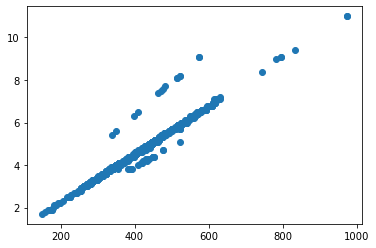

In [5]:
# We can see how the features are related to the target
plt.scatter(df['CO2 Emissions'],df['Combined rate'])

We could define a function like below to use for making better quality plots

In [6]:
def plot(x,y,xlabel,ylabel,color):
    plt.scatter(x,y,s=60,c=color,alpha=0.4)
    plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)
    #plt.axhline(y=0.0,color='purple',linestyle='--',linewidth=1.5)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig(feature+'_vs_'+target+'.pdf',dpi=80)
    plt.show()
    plt.close()
    

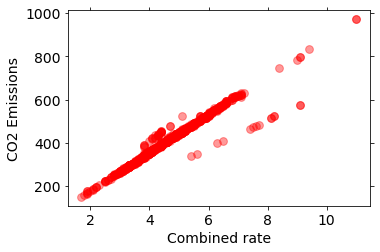

In [7]:
effect='CO2 Emissions'
cause='Combined rate' # try 'City rate', 'Hwy rate', 'Combined rate','premium_mpg'
#cause='Cylinders'
#cause='premium_mpg'
plot(df[cause],df[effect],cause,effect,'r')

Just looking at the features it looks like a linear regression problem (Just recall the equation for straight line, y = mx + c)

In [8]:
df=df_orig[['Combined rate','CO2 Emissions']]
#df=df_orig[['Engine Size','CO2 Emissions']]
df.head()
data_set=df.to_numpy()
test_size=0.2 # 80 % train and 20 % test
x_tr, x_tt= train_test_split(data_set,test_size=test_size,shuffle=True)
print(np.shape(x_tr))
x_train=x_tr[:,:-1];y_train=x_tr[:,-1];x_test=x_tt[:,:-1];y_test=x_tt[:,-1]
#x_train=x_tr[:,:1];y_train=x_tr[:,1:2];x_test=x_tt[:,:1];y_test=x_tt[:,1:2]

print(np.shape(x_train),np.shape(y_train))
print(np.shape(x_test),np.shape(y_test))

#Training a linear model
clf=linear_model.LinearRegression()
clf.fit(x_train,y_train)
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

# getting mean asolute differences
train_mae=mean_absolute_error(y_train,pred_train)
test_mae=mean_absolute_error(y_test,pred_test)

print('Train MAE is %f and test MAE is %f '%(train_mae,test_mae))

(756, 2)
(756, 1) (756,)
(189, 1) (189,)
Train MAE is 9.684771 and test MAE is 10.737046 


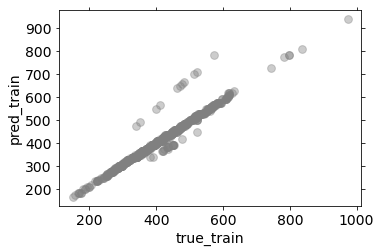

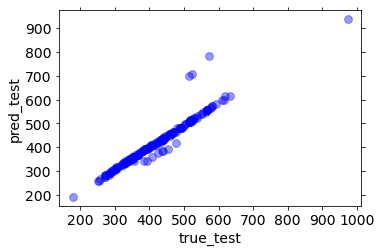

In [9]:
#Plotting 
plot(y_train,pred_train,'true_train','pred_train','grey')
plot(y_test,pred_test,'true_test','pred_test','blue')


#### It makes more sense to plot the train and test predictions together in a plot.

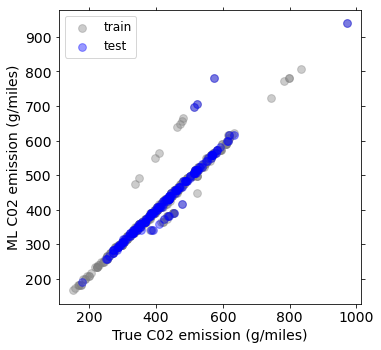

In [10]:

import matplotlib.pyplot as plt1
s=60
alpha=0.4
fontsize=14
figsize=(6,6)
plt1.subplots(figsize=figsize)
xlabel='True C02 emission (g/miles)'
ylabel='ML C02 emission (g/miles)'
plt1.scatter(y_train,pred_train,color='grey',s=60,alpha=0.4,label='train')
plt1.scatter(y_test,pred_test,color='blue',s=60,alpha=0.4,label='test')
plt1.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)
plt1.subplots_adjust(left=0.2)
plt1.subplots_adjust(bottom=0.2)
plt1.xlabel(xlabel,fontsize=fontsize)
plt1.ylabel(ylabel,fontsize=fontsize)
plt1.xticks(fontsize=fontsize)
plt1.yticks(fontsize=fontsize)
plt1.legend(fontsize=fontsize-2)
plt1.savefig('linear_reg_parity_plot_combined.pdf',dpi=80)
plt1.show()
plt1.close()

In [11]:
c=clf.intercept_
m=clf.coef_
m
print('Train slope is {} and the intercept is {} '.format(m,c))

Train slope is [83.09161439] and the intercept is 24.999543130917402 


#### Is linear model equivalent to y(x1,x2,....xn) = m1x1 + m2x2 + .... + c?
If so the result of the outcome below should be ideally zero (or very very close to zero).

In [12]:
y_hat=np.inner(m,x_test)+c
mean_absolute_error(y_hat,pred_test)

0.0

### Mean Absolute Error (MAE) is not the only metric to evaluate the performance
Link to various metrics in scikit-learn : https://scikit-learn.org/stable/modules/model_evaluation.html

In [13]:
### Root mean squared error (Ideal score is zero, the less the better)
train_rmse=np.sqrt(mean_squared_error(y_train,pred_train))
test_rmse=np.sqrt(mean_squared_error(y_test,pred_test))
print('Train RMSE is %f and test RMSE is %f '%(train_rmse,test_rmse))

Train RMSE is 23.783541 and test RMSE is 27.563587 


In [14]:
### R- squared error (Ideal score is 1.0, closer to 1.0 the better)
train_r2=r2_score(y_train,pred_train)
test_r2=r2_score(y_test,pred_test)
print('Train R2-score is %f and test R2-score is %f '%(train_r2,test_r2))

Train R2-score is 0.947395 and test R2-score is 0.924705 


#### Saving and re-loading a model

In [15]:
#save
#clf_save_lin=pickle.dumps(clf)
#reload
#clf_reload_lin=pickle.loads(clf_save_lin)

#### Task1 : Building a linear model that can use two or more features


In [16]:
#Hint:
#Replace df=df_orig[['Combined rate','CO2 Emissions']] in the cell number 6 (In [6]: ) by
#df=df_orig[['Engine Size','Combined rate','CO2 Emissions']]   and re run the cells 6 -12



#### We also encourage you to try different features displayed on cell 2 (In [2]: for the Task 1


## Non-linear regression

There are several algorithms for non-linear regression, we will here focus particularly on the kernel ridge regression using
the 'Laplacian' kernel 

##### Laplacian kernel 
Form of kernel: source link (https://scikit-learn.org/stable/modules/metrics.html#laplacian-kernel)


Details on implementation: (https://onlinelibrary.wiley.com/doi/10.1002/qua.24954/abstract/)

In [17]:
def non_linear_model(x_train, y_train, nfold, nthread,in_alpha=np.logspace(-15, 5, 21, base=2), in_gamma=np.logspace(-15, 5, 21, base=2), kernel=None, rseed=None):
    if rseed:
        random.seed(rseed)
        np.random.seed(rseed)

    neg_root_mean_squared_error = make_scorer(mean_squared_error, greater_is_better=False)

    clf = GridSearchCV(KernelRidge(kernel=kernel), cv=nfold, n_jobs=nthread, verbose=1, scoring=neg_root_mean_squared_error, param_grid={"alpha":in_alpha, "gamma": in_gamma})

    clf.fit(x_train, y_train)

    return clf

The key takeaway from above expression is that alpha and beta are two hyperparameters of the model that are tuned
by using the grid search. We used mean_squared_error metric for tuning it. 

In [18]:

ker='laplacian';nfold=5;nthread=2;number = random.randint(1, 1000)

rseed = random.seed(number);test_size = 0.20
alphas=np.logspace(-15, 5, 21, base=2);gammas=np.logspace(-15, 5, 21, base=2)

clf=non_linear_model(x_train, y_train,nfold, nthread, in_alpha=alphas, in_gamma=gammas, kernel=ker, rseed=rseed)

pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

print('Train MAE is %f and test MAE is %f '%(train_mae,test_mae))

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
Train MAE is 9.684771 and test MAE is 10.737046 


#### Plotting how train and test error look

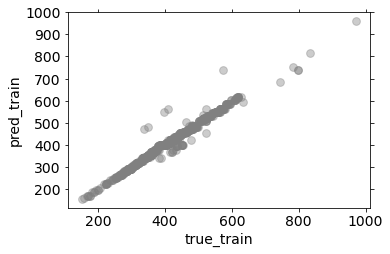

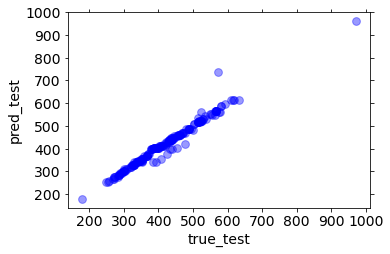

In [19]:
plot(y_train,pred_train,'true_train','pred_train','grey')
plot(y_test,pred_test,'true_test','pred_test','blue')

#### Combining both plots (parity plot)

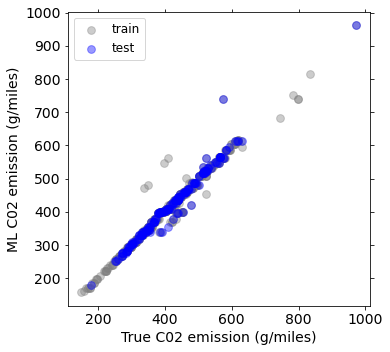

In [20]:
import matplotlib.pyplot as plt1
s=60
alpha=0.4
fontsize=14
figsize=(6,6)
plt1.subplots(figsize=figsize)
xlabel='True C02 emission (g/miles)'
ylabel='ML C02 emission (g/miles)'
plt1.scatter(y_train,pred_train,color='grey',s=60,alpha=0.4,label='train')
plt1.scatter(y_test,pred_test,color='blue',s=60,alpha=0.4,label='test')
plt1.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)
plt1.subplots_adjust(left=0.2)
plt1.subplots_adjust(bottom=0.2)
plt1.xlabel(xlabel,fontsize=fontsize)
plt1.ylabel(ylabel,fontsize=fontsize)
plt1.xticks(fontsize=fontsize)
plt1.yticks(fontsize=fontsize)
plt1.legend(fontsize=fontsize-2)
plt1.savefig('krr_lap_parity_plot_combined.pdf',dpi=80) # put '#' at the start if you don't want to save it.
plt1.show()
plt1.close()

#### Different error metrics similar to what we did for linear regression model

In [21]:
train_mae=mean_absolute_error(y_train,pred_train)
test_mae=mean_absolute_error(y_test,pred_test)

print('Train MAE is %f and test MAE is %f '%(train_mae,test_mae))

train_rmse=np.sqrt(mean_squared_error(y_train,pred_train))
test_rmse=np.sqrt(mean_squared_error(y_test,pred_test))
print('Train RMSE is %f and test RMSE is %f '%(train_rmse,test_rmse))

### R- squared error (Ideal score is 1.0, closer to 1.0 the better)
train_r2=r2_score(y_train,pred_train)
test_r2=r2_score(y_test,pred_test)
print('Train R2-score is %f and test R2-score is %f '%(train_r2,test_r2))

Train MAE is 6.636336 and test MAE is 7.226944 
Train RMSE is 15.984052 and test RMSE is 17.037752 
Train R2-score is 0.976240 and test R2-score is 0.971231 


#### Task 2: Please rerun the non-linear model using more than one input features 

## Classification
There are several algorithms for the classification. Here we will focus on Support Vector Machine (SVM)

link to data (https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv)

Description of the dataset

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Sample ID             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

First step is to look at the dataset to figure out if classification task makes sense here

In [22]:
df_orig = pd.read_csv("cell_samples.csv")
df=df_orig
print(df.dtypes)
df.head()
print(df.shape)


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object
(699, 11)


Although except the column 'ID', all other columns were supposed to have integer values, we noticed one of the columns
('BareNuc') has different data type. Luckily in our case there are only few cases where the values of 'BareNuc' are
not integers. Therefore we drop those rows which contains the non-zero values. However, if we wish we could altogether drop that column as well.

In [23]:
## Two options : first to remove rows that are not integer
df = df_orig[pd.to_numeric(df_orig['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes
print(df.shape)
#df1=df.drop("BareNuc", axis='columns')
#print(df1.shape)
#print(df1.dtypes)
## second to remove only rows that have not int values


(683, 11)


C:\Users\santosha\AppData\Local\Temp/ipykernel_6336/1525898564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


First, we have defined our target which is 'Class' (2 for benign and 4 for malignant). The plot below looks for the 
correlation between two input features (feat1 and feat2) for predicting benign or malignant. 

In [24]:
def cell_class_plot(df,feat1,feat2):
    x_ax_mal=np.asarray(df[df['Class'] == 4][feat1])
    y_ax_mal=np.asarray(df[df['Class'] == 4][feat2])
    x_ax_ben=np.asarray(df[df['Class'] == 2][feat1])
    y_ax_ben=np.asarray(df[df['Class'] == 2][feat2])
    plt.scatter(x_ax_mal,y_ax_mal,s=60,c='r',alpha=0.5)
    plt.scatter(x_ax_ben,y_ax_ben,s=60,c='b',alpha=0.5)
    plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.2)
    plt.subplots_adjust(right=0.8)
    plt.xlabel(feat1,fontsize=14)
    plt.ylabel(feat2,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(['mal','ben'],fontsize=12,loc='center',bbox_to_anchor=(0.65, 0., 1.0, 1.0))
    #plt.savefig(feat1+'_vs_'+feat2+'.pdf',dpi=80) # Remove the '#' symbol at the start of this line to save the plot
    plt.show()
    plt.close()



#### Below we are plotting the correlation of features 'SingEpiSize' and 'MargAdh'. Feel free to play around with other features as well.

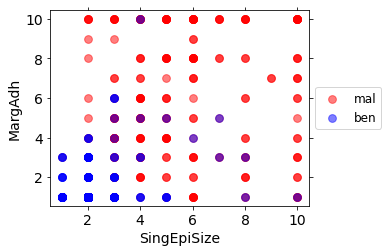

In [25]:
cell_class_plot(df,'SingEpiSize','MargAdh')

#### Since our target values ('Class') are intergers we want to make sure that the data type remains integer. 

In [26]:
# We want to make sure the class types are integers
df['Class']=df['Class'].astype('int')

C:\Users\santosha\AppData\Local\Temp/ipykernel_6336/444862765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']=df['Class'].astype('int')


#### Preparing data for training and testing

In [27]:
data_set=df.to_numpy()
print(np.shape(data_set))
test_size=0.2 # 80 % train and 20 % test
x_tr, x_tt= train_test_split(data_set,test_size=test_size,shuffle=True)
print(np.shape(x_tr))
x_train=x_tr[:,1:-1];y_train=x_tr[:,-1];x_test=x_tt[:,1:-1];y_test=x_tt[:,-1] 
#x_train=x_tr[:,1:10];y_train=x_tr[:,10:11];x_test=x_tt[:,1:10];y_test=x_tt[:,10:11] 
print(np.shape(x_train))
print(np.shape(y_train))

(683, 11)
(546, 11)
(546, 9)
(546,)


#### Brief discussion of the support vector machine

link to SVM implemented in scikit-learn (https://scikit-learn.org/stable/modules/svm.html#classification)

In [28]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [29]:
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

#### Accuracy of the Classifier is understood in terms of four metric namely accuracy, precision, recall and F1-score

![true_positive_false_negative_def.png](attachment:true_positive_false_negative_def.png)

source (https://storage.googleapis.com/lds-media/images/Confusion_Matrix.width-1200.png)

![accuracy_metric.gif](attachment:accuracy_metric.gif)


source (https://www.biorxiv.org/sites/default/files/highwire/biorxiv/early/2017/01/04/087445/embed/graphic-10.gif)

Below is a function defined to plot the 'Confusion matrix'. Using this metric we can visualize and assess different
metrics.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0,fontsize=14)
    plt.yticks(tick_marks, classes,fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True',fontsize=14)
    plt.xlabel('Predicted',fontsize=14)

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        94
           4       0.95      0.98      0.97        43

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.97       137
weighted avg       0.98      0.98      0.98       137

Confusion matrix, without normalization
[[92  2]
 [ 1 42]]


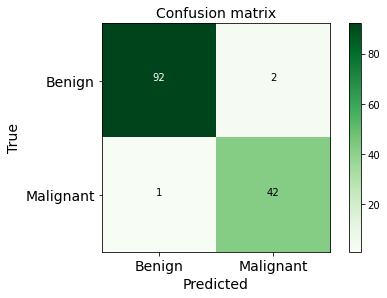

In [31]:
cnf_matrix = confusion_matrix(y_test, pred_test, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_test))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

## Understanding errors

Ideal value of all scores is 1. Recall focuses on "how many true samples" were wrongly predicted "false". While Precision 
focuses on "how many wrong samples" were predicted true. If a classifier has a low recall but high precision it refers
that the algorithm does a good job in not predicting wrong samples as true, but is unable to predict many right samples
as true.